# Physics 101: Planck law

## Introduction
THe idea of this notebook is to introduce very basically, without going into too much details, what is Planck law, its relationship with Wien's displacement law and Stefan-Boltzmann law.

## Entropy in information theory
It is interesting to start this notebook by taking a look back at the definition of entropy as used in digital signal processing, we will hereby reproduce the introductory content from the notebook called InformationTheoryOptimization.

### Basic definitions
Let's talk about a set of N sample vectors $x_i, i=0,1,\dots N-1$ where $x_i \in \mathbb{R}^P$, such that each $x_i$ is an output of a random process, that can be modeled using a probability density function: 
$$
    P_{\theta}(x) = P(x|\theta)
$$
$\theta \in \mathbb{R}^K$ being the pdf parameter vector.

We can also define the empirical data distribution, that sums to one, using:
$$
    P_{D}(x) = \frac{1}{N} \sum_{i=0}^{N-1} \delta(x-x_i)
$$

Where $\delta(x)$ stands for the Dirac delta function. 

### Information theory framework
In the framework of information theory, a signal of interest can be modeled as a message produced by a transmitter, enventually modified by the channel, that should be retrieved by the receiver.
The intrinsic complexity of the message, or the quantity of information it contains can be modeled using shannon entropy, defined itself as the expectation of the self information for symbols coming from a given class of message.

### Self information
Self information $I$ of a random event $\omega$ with probability $P(\omega)$ is defined as

$$
    I(\omega) = log\left(\frac{1}{P(\omega)}\right) = -log(P(\omega))
$$

We generally use the logarithm in base 2 so that self information can be defined in bits, and so do the entropy.
Let's list some interesting properties of this metric:
  - as $I$ is a monotically increasing function of $\frac{1}{P(\omega)}$, the realisation of the event that have a low probability gives us a large quantity of information.
  - An event that is not random, ie for wich $P(\omega)=1$ gives no informations.
  - The simultanneous occurence of two independent events $\omega_a$ and $\omega_b$ with respective probability $P(\omega_a)$ and $P(\omega_b)$ bring us a total quantity of infomation equal to the sum of the information of the two events, due to the use of the logarithm, ie $$ log\left(\frac{1}{P(\omega_a)P(\omega_b)}\right) = log\left(\frac{1}{P(\omega_a)}\right)+log\left(\frac{1}{P(\omega_b)}\right) = I(\omega_a)+I(\omega_b)$$.


### Entropy
Shannon entropy $H(x)$, is defined as the expectation of the self information for a random variable $H(x)=E[I(X)] = E[-log(P(x))]$ which reads in the discrete case:

\begin{align*}
    H(x) = - \sum_{i=0}^{N-1} P(x_i)log(P(x_i))
\end{align*}

It is interesting to notice that $H(x)$ can be interpreted as the entopy rate of a data source or the average number of bits per symbol needed to encode a message whith a known symbol probability density function.

This concept can obviously be extended to blocks or structured blocks of data instead of symbols.

## Entropy in Physics
The definition of entropy in physics comes from the wikipedia article: https://en.wikipedia.org/wiki/Entropy_(classical_thermodynamics)

Entropy is a property of thermodynamical systems. The term entropy was introduced by Rudolf Clausius who named it from the Greek word $\tau \rho o \pi \eta$, "transformation". He considered transfers of energy as heat and work between bodies of matter, taking temperature into account. Bodies of radiation are also covered by the same kind of reasoning.

Ludwig Boltzmann explained the entropy as a measure of the number of possible microscopic configurations $\Omega$ of the individual atoms and molecules of the system (microstates) which comply with the macroscopic state (macrostate) of the system. Boltzmann then went on to show that $k ln(\Omega)$ was equal to the thermodynamic entropy. The factor $k$ has since been known as Boltzmann's constant.

In a thermodynamic system, differences in pressure, density, and temperature all tend to equalize over time. For example, consider a room containing a glass of melting ice as one system. The difference in temperature between the warm room and the cold glass of ice and water is equalized as heat from the room is transferred to the cooler ice and water mixture. Over time the temperature of the glass and its contents and the temperature of the room achieve balance. The entropy of the room has decreased. However, the entropy of the glass of ice and water has increased more than the entropy of the room has decreased. In an isolated system, such as the room and ice water taken together, the dispersal of energy from warmer to cooler regions always results in a net increase in entropy. Thus, when the system of the room and ice water system has reached temperature equilibrium, the entropy change from the initial state is at its maximum. The entropy of the thermodynamic system is a measure of how far the equalization has progressed.

From a macroscopic perspective, in classical thermodynamics, the entropy is a state function of a thermodynamic system: that is, a property depending only on the current state of the system, independent of how that state came to be achieved. Entropy is a key ingredient of the Second law of thermodynamics, which has important consequences e.g. for the performance of heat engines, refrigerators, and heat pumps.



## Planck law
Eventually, Max Planck, who was a famous german physicist, considered as one of the father of quantum physics, came up with the following formula:

\begin{align*}
    B_{\nu}(T) = A \frac{2 h \nu^{3} / c^{2}}{exp(h \nu / k T) - 1}
\end{align*}

Check Jansky: https://en.wikipedia.org/wiki/Jansky

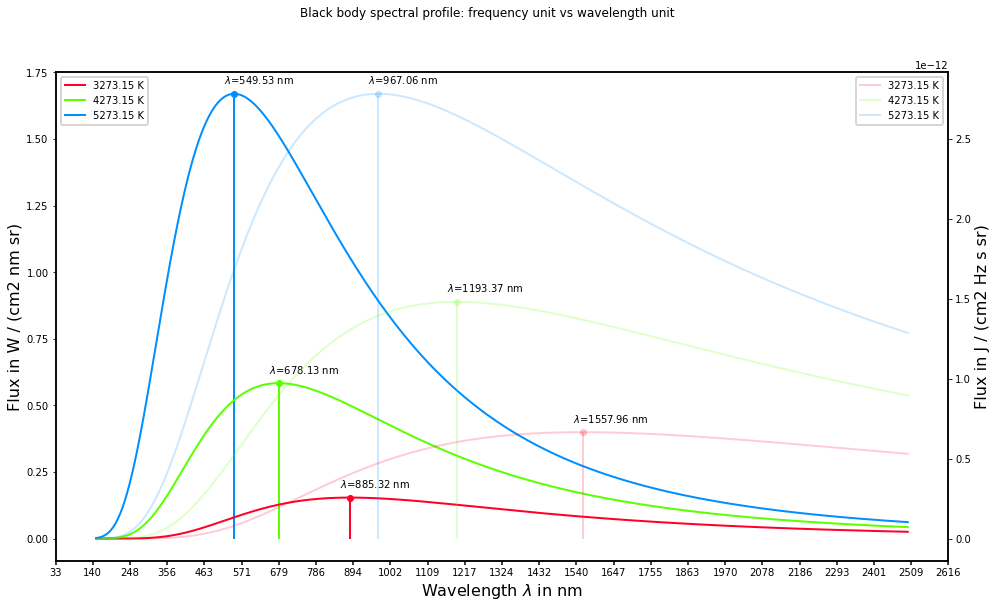

In [11]:
# Documentation for this module can be found here:
#https://docs.astropy.org/en/stable/api/astropy.modeling.physical_models.BlackBody.html?highlight=BlackBody

# Numerical stuff
import numpy as np

# Viz
import matplotlib.pyplot as plt

# Physics
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
from astropy.modeling import models
from astropy import units as u #https://docs.astropy.org/en/stable/units/

def get_astropy_bb(temp_deg):
    return models.BlackBody(temperature=(temp_deg*u.deg_C).to(
        u.K,equivalencies=u.temperature()))

# Define the whole range of wavelength
wav = np.arange(150, 2500) * u.nm
wav_unit = wav.unit
temp_range = [3000,4000,5000]
cm = plt.get_cmap('gist_rainbow')

colors = [cm(1. * i / len(temp_range)) for i in range(len(temp_range))]
alpha = 0.2
light_colors = [tuple(list(cm(1. * i / len(temp_range)))[:-1]+[alpha]) for i in range(len(temp_range))]

hz_flux_unit=u.Joule/(u.cm**2 * u.Hertz * u.second * u.steradian)
nm_flux_unit=u.W/(u.cm**2 * u.nanometer * u.steradian)

with quantity_support():
    fig, ax1 = plt.subplots(figsize=(16, 9))
    fig.suptitle("Black body spectral profile: frequency unit vs wavelength unit")
    ax1.set_xlabel("Wavelength $\lambda$ in nm")

    # Plot wavelength
    ax1.set_ylabel(f"Flux in {nm_flux_unit}")

    # Plot frequency
    ax2 = ax1.twinx()
    ax2.set_ylabel(f"Flux in {hz_flux_unit}")
    
    for temp_c, color, light_color in zip(temp_range, colors, light_colors):
        bb_astropy = get_astropy_bb(temp_c)
        flux_astropy = bb_astropy(wav)
        label = f"{(temp_c*u.deg_C).to(u.K,equivalencies=u.temperature())}"
        
        # Plot wavelength
        ax1.plot(wav, flux_astropy.to(nm_flux_unit, equivalencies=u.spectral_density(wav)), color=color,
                 label=label)
        # Mark maximum
        max_wav = bb_astropy.lambda_max.to(wav_unit, equivalencies=u.spectral())
        max_intensity = bb_astropy(max_wav).to(nm_flux_unit,equivalencies=u.spectral_density(max_wav))
        markerline, stemlines, baseline = ax1.stem([max_wav], [max_intensity], use_line_collection=True)
        plt.setp(stemlines, 'color', color)
        plt.setp(markerline, 'color', color)
        ax1.annotate(f"$\lambda$={max_wav:.2f}", xy=(max_wav,max_intensity), xycoords='data',
            xytext=(-10,10), textcoords='offset points')


        # Plot frequency
        ax2.plot(wav, flux_astropy.to(hz_flux_unit), color=light_color, label=label)
        # Mark maximum_
        max_wav = bb_astropy.nu_max.to(wav_unit, equivalencies=u.spectral())
        max_intensity = bb_astropy(max_wav).to(hz_flux_unit, equivalencies=u.spectral_density(max_wav))
        markerline, stemlines, baseline = ax2.stem([max_wav], [max_intensity], use_line_collection=True)
        plt.setp(stemlines, 'color', light_color)
        plt.setp(markerline, 'color', light_color)
        ax2.annotate(f"$\lambda$={max_wav:.2f}", xy=(max_wav,max_intensity), xycoords='data',
            xytext=(-10,10), textcoords='offset points')

    # More fine grained x-axis ticks
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.linspace(start, end, 25))

    # Nice legend
    ax1.legend( loc="upper left")
    ax2.legend(loc="upper right")

plt.show()


## Black body spectrum model fitting for astronomy

### Introduction
Lets now jump to practical aspects of black body modeling of real object, in particular, we would like to use this model in order to estimate temperature of stars from astronomical spectroscopy measurments.
Although we won't enter in the details, most stars are not black bodies, many phenomena influence their spectra, but the most prominent feature that will result in the spectrum of a star differing from black body is absoption lines.
We recall, that sun, as far as we know has an "outer shell" wich is made of gas, that is cooler than inner layers of the sun, and is called photosphere.
Since the photosphere is cooler but less dense than the interior region it is the screen that allows the continuous blackbody spectrum to be seen through, but at the wavelengths at which atoms in the photosphere can absorb light will photons be impeded in their outward travel.
The result is an absorption spectrum, a continuous blackbody spectrum with dark absorption lines superimposed on it. We can even add that, if you can perform spectrocopy at spatially resolved scale, then the amount of photosphere between the observer and the inner layer of the sun should influence the depth of the absoption lines.

### Observing a star

In [13]:
# Numerical toosl
import numpy as np
from scipy.optimize import curve_fit

# Dataviz
import matplotlib.pyplot as plt

# See doc for simbad queries here: https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import Angle, SkyCoord
from astropy.io import fits
import astropy.wcs as fitswcs #wcs
from specutils import Spectrum1D, SpectralRegion # Installed asdf==2.10.0 to solve dependency nightmare

In [14]:
#Get a simbad instance
simbad = Simbad()
# List votable fields
Simbad.list_votable_fields()
#add spectral type parameters for VOTable request
simbad.add_votable_fields('sptype')

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [15]:
#request
result_table = simbad.query_object("HR1074")

In [16]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object,int32
HD 21856,03 32 40.0150,+35 27 42.207,14,14,0.075,0.055,90,A,O,2020yCat.1350....0G,B1V,C,,1


In [17]:
print(f'RA unit: {result_table["RA"].unit}')
assert result_table["RA"].unit == '"h:m:s"'
print(f'DEC unit: {result_table["DEC"].unit}')
assert result_table["DEC"].unit == '"d:m:s"'
ra_h, ra_m, ra_s = result_table["RA"][0].split()
de_d, de_m, de_s = result_table["DEC"][0].split()
coord = SkyCoord(
    ra=Angle(f"{ra_h}h{ra_m}m{ra_s}s"),
    dec=Angle(f"{ra_h}d{ra_m}m{ra_s}s"))

RA unit: "h:m:s"
DEC unit: "d:m:s"


In [18]:
result_table.pprint(show_unit=True)
#Coordinates
print(f"Coordinates are: {coord}")
#Spectral Type
print(f"Spectral Type is {result_table['SP_TYPE'][0]}")

 MAIN_ID        RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SP_TYPE SP_QUAL SP_BIBCODE SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"                         mas          mas           deg                                                                                             
--------- ------------- ------------- ------- -------- ------------ ------------ ------------- -------- -------------- ------------------- ------- ------- ---------- ----------------
HD  21856 03 32 40.0150 +35 27 42.207      14       14        0.075        0.055            90        A              O 2020yCat.1350....0G     B1V       C                           1
Coordinates are: <SkyCoord (ICRS): (ra, dec) in deg
    (53.16672917, 3.54444861)>
Spectral Type is B1V


### Displaying the target within an Aladdin widget
Source : https://github.com/cds-astro/ipyaladin

Previously retrieved tables can then be displayed on the Aladdin widget (in the centre of the cross here for HR1074). It is also possible to make a query on a region rather than a separate object with "Simbad.query_region""Simbad.query_region"

In [19]:
import ipyaladin.aladin_widget as ipyal
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix ipyaladin

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension ipyaladin/extension...
      - Validating: OK


In [20]:
aladin = ipyal.Aladin(target='HR1074', fov=1.5, survey="P/allWISE/color")
#aladin.survey="P/SDSS9/color"
#Show tables on Aladin widget
aladin.add_table(result_table)
#record render in jpeg
#aladin.get_JPEG_thumbnail()
aladin

Aladin(fov=1.5, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

### Loading and analyzing spectrum


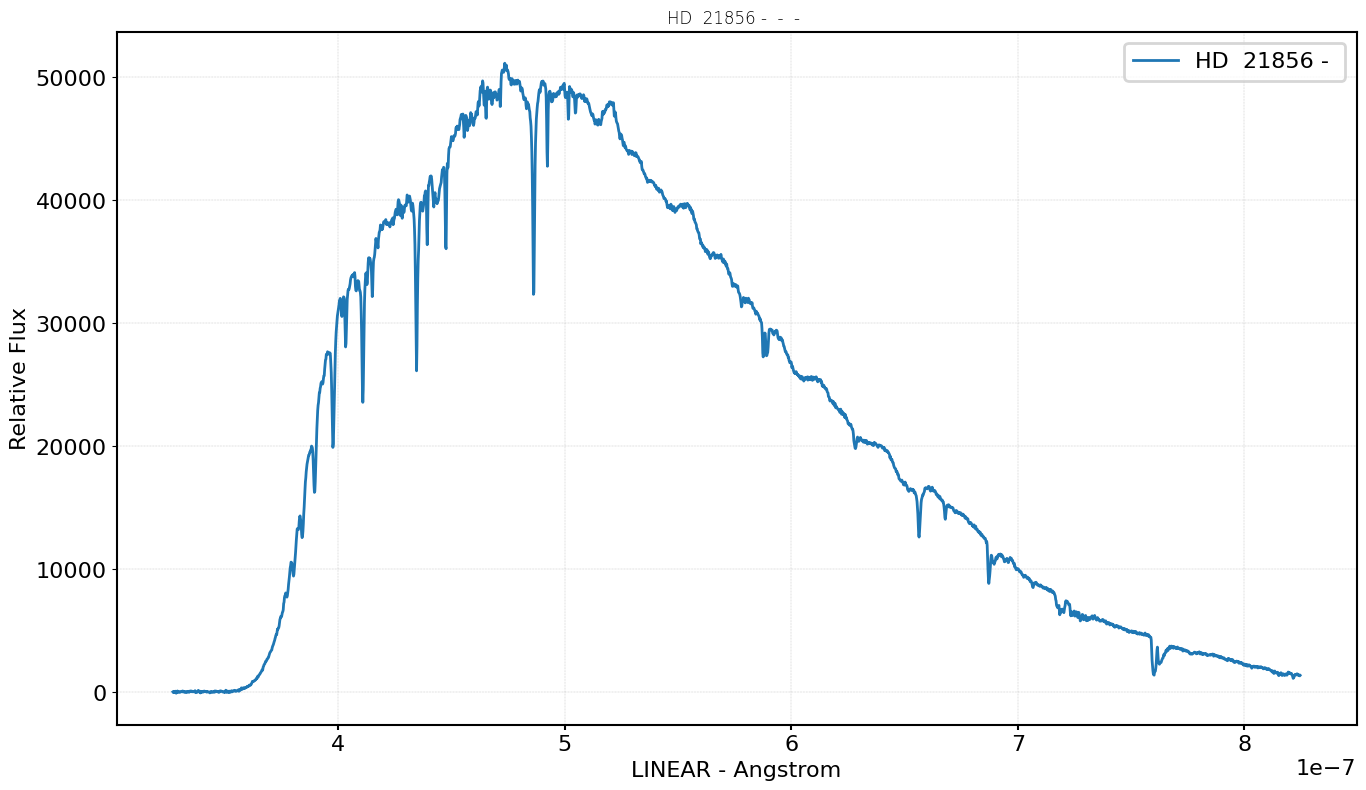

In [31]:
#imports
spec_path = './data/2_B_HR1074_result.fits'

#open & load spectrum file
file = fits.open(spec_path)  
specdata = file[0].data
header = file[0].header
header['CUNIT1'] = header.get('CUNIT1', "Angstrom")
header['OBJNAME'] = header.get('OBJNAME', result_table["MAIN_ID"][0])
header['DATE-OBS'] = header.get('DATE-OBS', "")
header['EXPTIME2'] = header.get('EXPTIME2', "")
header['DETNAM'] = header.get('DETNAM', "")

#make WCS object
wcs_data = fitswcs.WCS(header={'CDELT1': header['CDELT1'], 'CRVAL1': header['CRVAL1'],
                               'CUNIT1': header['CUNIT1'], 'CTYPE1': 'WAVE',
                               'CRPIX1': header['CRPIX1']})
#set flux units
flux= specdata * u.Jy
#create a Spectrum1D object with specutils
spec = Spectrum1D(flux=flux, wcs=wcs_data)
#plot spectrum
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(spec.spectral_axis * u.AA, spec.flux)
#X axis label
ax.set_xlabel(header['CTYPE1'] + ' - ' + header['CUNIT1'])
#Y axis label
ax.set_ylabel('Relative Flux')
#Grid configuration
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
#legend configuraiton
legend_value = header['OBJNAME'] + ' - ' + header['DATE-OBS']
ax.legend([legend_value], loc=('best'))
#prepare and set plot title with header infos 
spectrumTitle = header['OBJNAME'] + ' - ' + header['DATE-OBS'] + ' - '+ header['EXPTIME2']+ ' - ' + str(header['DETNAM'])
ax.set_title(spectrumTitle, loc='center', fontsize=12, fontweight=0.5)
#Show Plot
plt.show()

### Fitting Planck black body radiation curve

array([  29.686375,  -19.440279,   38.417244, ..., 1381.0852  ,
       1333.3087  , 1373.9984  ], dtype=float32)

Parameter of best-fitting model: T = 5824.560115982294


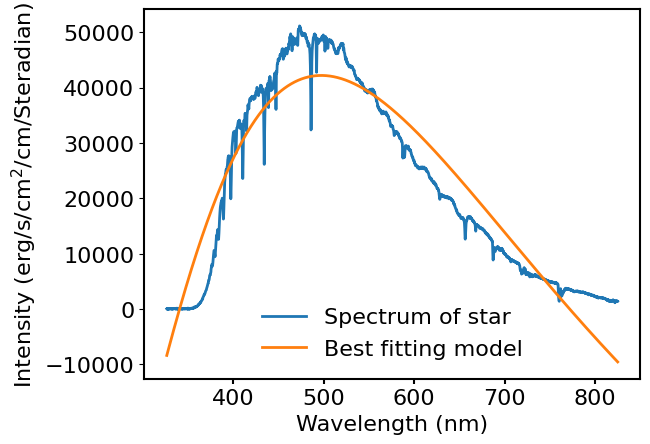

In [57]:
def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (nm) and temperature (K).
    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-9 * lam # convert to meters
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

wa = spec.spectral_axis.to(u.nm).value   # wavelengths in nm
y  = spec.flux.to(u.Jy).value

# plot the input model and synthetic data

plt.figure()
plt.plot(wa, y, ls='-', lw=2, label='Spectrum of star')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (erg/s/cm$^2$/cm/Steradian)')

# fit two blackbodies to the synthetic data

def func(wa, T, offset, scaling):
    return blackbody_lam(wa, T)* scaling + offset

# Note the initial guess values for T1 and T2 (p0 keyword below). They
# are quite different to the known true values, but not *too*
# different. If these are too far away from the solution curve_fit()
# will not be able to find a solution. This is not a Python-specific
# problem, it is true for almost every fitting algorithm for
# non-linear models. The initial guess is important!

# Initial estimate for noise rms pointwise
sigmaInit = np.ones_like(y)*np.std(y)*0.01
# Initial estimate for T, scaling and offset
Tinit = 9000
yinit = func(wa, T=Tinit, offset=0, scaling=1)
offsetInit = 0
scalingInit = np.mean(y/yinit)
# Run optimization
for i in range(100):
    popt, pcov = curve_fit(func, wa, y, p0=(Tinit, offsetInit, scalingInit), sigma=sigmaInit)
    Tinit, offsetInit, scalingInit = popt
    sigmaInit = np.abs(y-func(wa, Tinit, offsetInit, scalingInit))

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).
bestT, bestOffset, bestScaling = popt
sigmaT = np.sqrt(np.diag(pcov))

ybest = func(wa, bestT, bestOffset, bestScaling)

print(f"Parameter of best-fitting model: T = {bestT}")

# degrees_of_freedom = len(wa) - 2
# resid = (y - func(wa, *popt)) / sigma
# chisq = np.dot(resid, resid)

# print(degrees_of_freedom, 'dof')
# print('chi squared %.2f' % chisq)
# print('nchi2 %.2f' % (chisq / degrees_of_freedom))

# plot the solution
plt.plot(wa, ybest, label='Best fitting model')
plt.legend(frameon=False)
#plt.savefig('fit_bb.png')